![UCI](https://miro.medium.com/v2/resize:fit:860/1*2A42NXeQD_LbUFdC_sfbfQ.png)

https://archive.ics.uci.edu/dataset/186/wine+quality

# Liberias

In [1]:
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install numpy
# !pip install scikit-learn

In [2]:
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.model_selection import train_test_split, cross_val_score # type: ignore
from sklearn.preprocessing import StandardScaler, LabelEncoder # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
from sklearn.neighbors import KNeighborsClassifier # type: ignore
from sklearn.svm import SVC # type: ignore
from sklearn.metrics import classification_report # type: ignore
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # type: ignore
from sklearn.inspection import permutation_importance # type: ignore

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Cargamos el dataset

In [3]:
# Cargamos ambos datasets
try:
    red = pd.read_csv('winequality-red.csv', sep=';')
    white = pd.read_csv('winequality-white.csv', sep=';')

    # Unimos ambos datasets
    red['type'] = "red"
    white['type'] = "white"
    data = pd.concat([red, white])
except:
    print("Error al leer los datasets")
    data = pd.read_csv('winequality.csv')

Error al leer los datasets


In [4]:
# # Opcional: Guardamos el dataset unido
# data.to_csv('winequality.csv', index=False)

# EDA

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


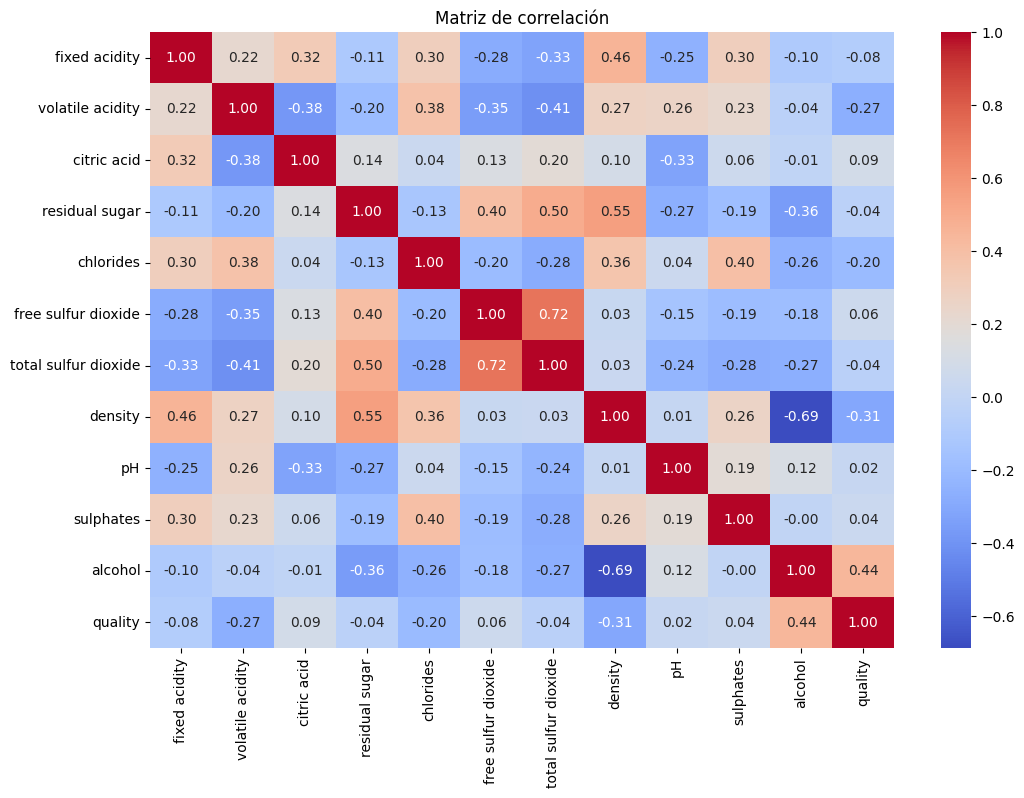

In [7]:
# Filtrar solo columnas numéricas para la correlación
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Mostrar la correlación de las características
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [8]:
def show_histograms(df):
    # Graficar la distribución de las variables
    df.hist(bins=20, edgecolor='black', linewidth=1, figsize=(14, 10))

    # Ajustar las cuadrículas para que se vean menos
    for ax in plt.gcf().axes:
        ax.grid(True, alpha=0.3)  # Ajustar la transparencia de las cuadrículas

    # Agregar título principal y ajustar márgenes
    plt.suptitle('Distribución de las variables', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuste para evitar que el título se solape

    plt.show()

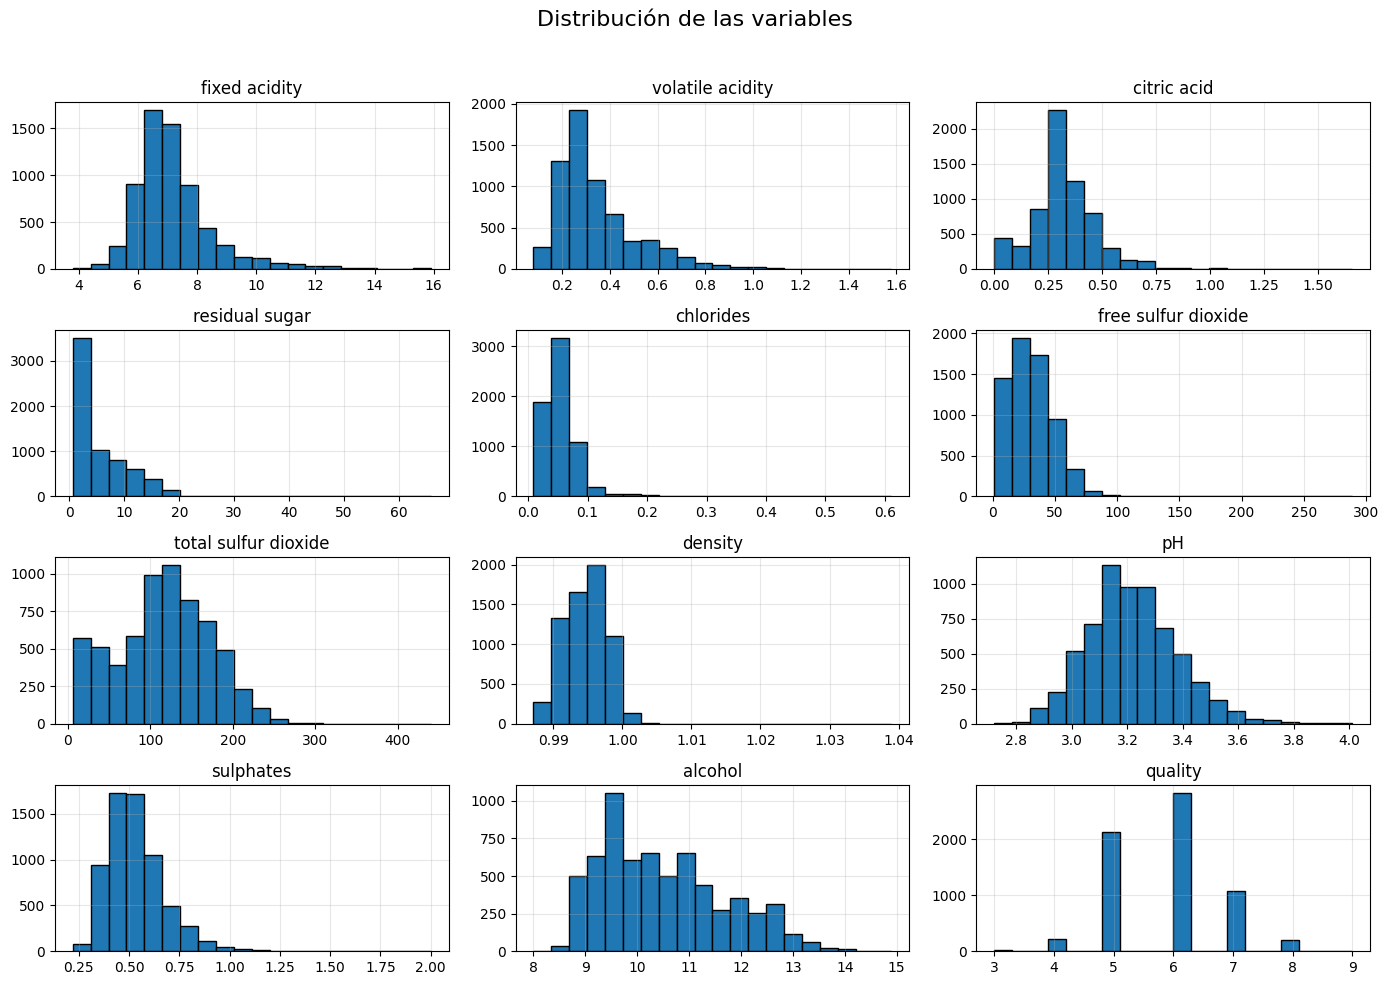

In [9]:
show_histograms(data)

Vamos a probar sin hacer transformaciones de los datos

In [10]:
# Separar características y variable objetivo
X = data.drop(columns=['type'])
y = data['type']

In [11]:
# Codificar la variable objetivo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting de datos

In [12]:
# Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Preprocesamiento

## Estandarizacion

In [13]:
# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelado

In [15]:
# Modelos a evaluar (Random Forest, KNN y SVM), sin ajustar hiperparámetros
models = {
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC()
}

In [16]:
def train_and_evaluate_models(models, X_train, y_train, X_test, y_test, feature_names):
    results = {}
    feature_importances = {}

    for name, model in models.items():
        # Validación cruzada
        cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)
        print(f"Validación cruzada para {name}:")
        print(f"Scores: {cross_val_scores}")
        print(f"Promedio de validación cruzada: {cross_val_scores.mean()}\n")
        
        # Entrenamiento y evaluación
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        report = classification_report(y_test, predictions, target_names=label_encoder.classes_)
        results[name] = report

        # Importancia de las características según el modelo
        if name == "RandomForest":
            importances = model.feature_importances_
            feature_importances[name] = importances
        else:
            # Permutation Importance para KNN y SVM
            perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
            feature_importances[name] = perm_importance.importances_mean
    
    return results, feature_importances

# Ejecutar el entrenamiento y evaluación
model_results, feature_importances = train_and_evaluate_models(models, X_train_scaled, y_train, X_test_scaled, y_test, X_train.columns)


Validación cruzada para Random Forest:
Scores: [0.99519231 0.99134615 0.99711261 0.99230029 0.99422522]
Promedio de validación cruzada: 0.9940353150218405

Validación cruzada para KNN:
Scores: [0.99519231 0.99326923 0.99615014 0.9894129  0.99615014]
Promedio de validación cruzada: 0.9940349448434145

Validación cruzada para SVC:
Scores: [0.99423077 0.99711538 0.99615014 0.99711261 0.99807507]
Promedio de validación cruzada: 0.9965367957355445



In [20]:
# Mostrar resultados para Random Forest
print(model_results['Random Forest'])

              precision    recall  f1-score   support

         red       0.99      0.98      0.99       341
       white       0.99      1.00      1.00       959

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [21]:
print(model_results['KNN'])

              precision    recall  f1-score   support

         red       0.98      0.97      0.98       341
       white       0.99      0.99      0.99       959

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.98      1300
weighted avg       0.99      0.99      0.99      1300



In [23]:
print(model_results['SVC'])

              precision    recall  f1-score   support

         red       1.00      0.98      0.99       341
       white       0.99      1.00      1.00       959

    accuracy                           0.99      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



# Matrices de confusion

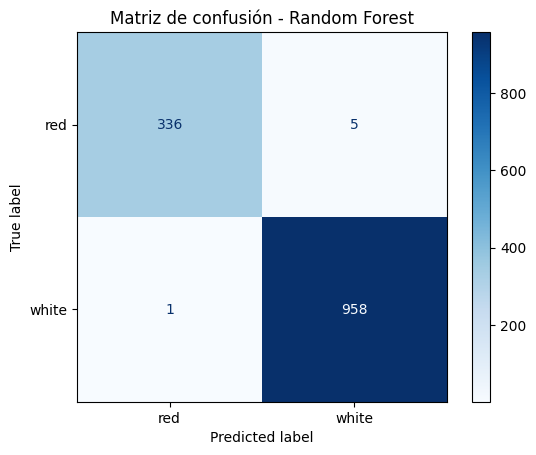

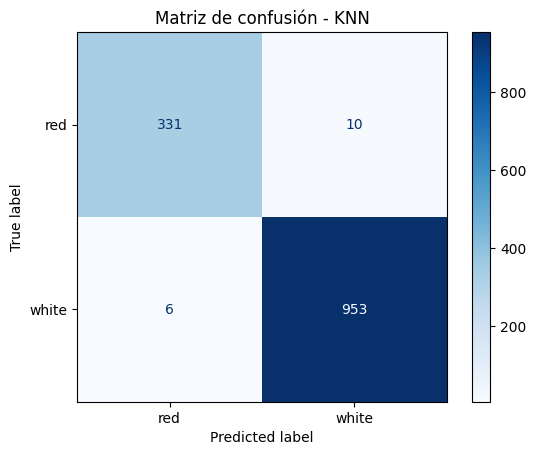

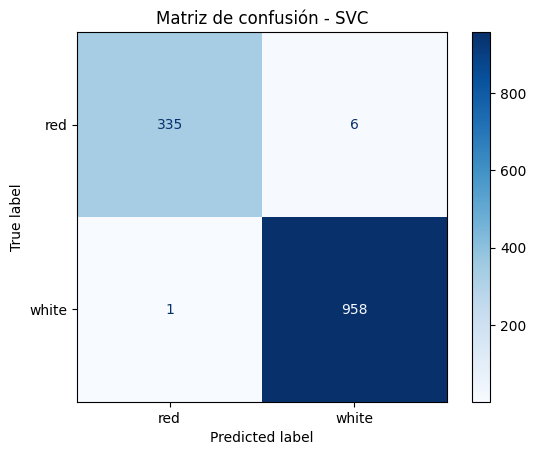

In [24]:
# Función para mostrar la matriz de confusión para cada modelo
def display_confusion_matrices(models, X_test, y_test):
    for name, model in models.items():
        predictions = model.predict(X_test)
        cm = confusion_matrix(y_test, predictions)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
        disp.plot(cmap="Blues")
        plt.title(f"Matriz de confusión - {name}")
        plt.show()

# Entrenar los modelos (de nuevo por si acaso)
for model in models.values():
    model.fit(X_train_scaled, y_train)

# Mostrar las matrices de confusión
display_confusion_matrices(models, X_test_scaled, y_test)


# Importancia de variables

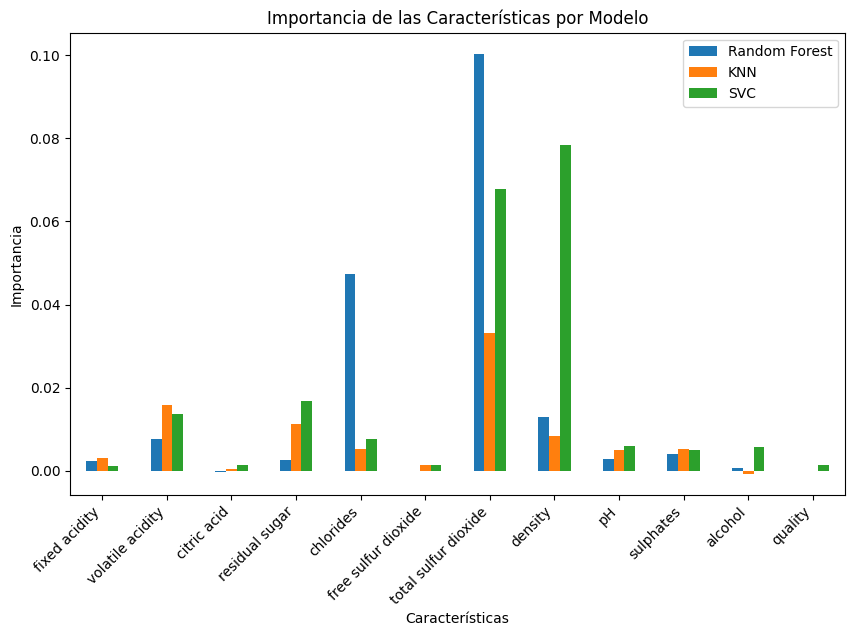

In [25]:
# Convertir a DataFrame
importances_df = pd.DataFrame(feature_importances, index=X_train.columns)

# Graficar las importancias de las características
importances_df.plot(kind='bar', figsize=(10,6))
plt.title('Importancia de las Características por Modelo')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=45, ha="right")
plt.show()